In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/2021 K 디지털 - 멀티/공유폴더/실습 폴더/news.csv")

In [ ]:
df = df.dropna()

In [ ]:
df['tokens'] = df['ngrams'].apply(lambda x :  ' '.join([w.split('/')[0] for w in x.split(",")]))
token_list = df['tokens'].tolist()

In [ ]:
len(token_list)

261802

In [ ]:
token_list[:2]

['만기 국채 수익률 fed fed 금리 인상 지속 따르 인플레이션 압력 완화 어렵 전망 인플레이션 제어 반면 만기 국채 수익률 fed 지속 금리 인상 수준 상승 예측 단기 국채 수익률 상승 나타나 반면 장기 국채 수익률 상승 제한 일드커브 플래트닝 가속 덧붙이 고용창출 호조 수입 증가 견인 고용시장 호전 소비자 지출 떠받치 단기 국채 일드커브 인플레이션 fed 고용창출 고용시장 수입 완화',
 '만기 국채 가격 최악 보내 만기 국채 수익률 수준 거래 마감 뉴욕 fed fed 금리 인상 했으나 인플레이션 제어 예상 만기 국채 수익률 소폭 수준 만기 국채 가격 fed 금리 인상 지속 최악 보내 덧붙이 fed 점진적 금리 인상 단행 fed 금리 인상 고용시장 동향 예의 주시 반면 고용창출 건수 호전 fed 공격적 금리 인상 정책 지속 가능성 강조 만기 국채 가격 포인트 오르 가격 움직이 수익률 떨어 만기 국채 수익률 기록 했었 만기 국채 가격 수익률 국채 인상']

In [ ]:
total_token_ls = [tokens.split() for tokens in token_list]
total_token_ls[0]

['만기',
 '국채',
 '수익률',
 'fed',
 'fed',
 '금리',
 '인상',
 '지속',
 '따르',
 '인플레이션',
 '압력',
 '완화',
 '어렵',
 '전망',
 '인플레이션',
 '제어',
 '반면',
 '만기',
 '국채',
 '수익률',
 'fed',
 '지속',
 '금리',
 '인상',
 '수준',
 '상승',
 '예측',
 '단기',
 '국채',
 '수익률',
 '상승',
 '나타나',
 '반면',
 '장기',
 '국채',
 '수익률',
 '상승',
 '제한',
 '일드커브',
 '플래트닝',
 '가속',
 '덧붙이',
 '고용창출',
 '호조',
 '수입',
 '증가',
 '견인',
 '고용시장',
 '호전',
 '소비자',
 '지출',
 '떠받치',
 '단기',
 '국채',
 '일드커브',
 '인플레이션',
 'fed',
 '고용창출',
 '고용시장',
 '수입',
 '완화']

In [ ]:
del df

In [ ]:
del token_list

In [ ]:
!pip install glove-python-binary

In [ ]:
from glove import Corpus, Glove

corpus = Corpus()
#말뭉치에서 동시 등장 행렬, 사전 만들기
corpus.fit(total_token_ls[:1000], window=5)

glove = Glove(no_components=100, learning_rate=0.05)
#corpus.matrix 동시 등장 행렬
glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)

Performing 20 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


In [ ]:
glove.most_similar("금리")

[('장단기', 0.9361501114365636),
 ('동결', 0.9017963007315121),
 ('부작용', 0.892156468482225),
 ('더이상', 0.8866363511380035)]

In [ ]:
glove.most_similar("인플레이션")

[('억제', 0.8866281452074762),
 ('제어', 0.8489176553048445),
 ('강화', 0.8245931298831677),
 ('관측', 0.8104734384319212)]

In [ ]:
from gensim.models import FastText
model = FastText(total_token_ls[:1000], size=100, window=5, min_count=2, sg=1, iter=100, min_n=3, max_n=6)

[('인하', 0.6190427541732788),
 ('맞췄으며', 0.5863194465637207),
 ('가능성', 0.5653703212738037),
 ('좁혀진', 0.5450276136398315),
 ('정책수단', 0.5426384210586548),
 ('초읽기', 0.536806583404541),
 ('두드려', 0.5318353772163391),
 ('인상', 0.5313268899917603),
 ('접근방법', 0.5271784067153931),
 ('밝힐', 0.5163829326629639)]

In [ ]:
model.wv.most_similar("인플레이션")

[('억제', 0.6456458568572998),
 ('제어', 0.6337130069732666),
 ('fed', 0.6314557790756226),
 ('정책위원회', 0.5940812826156616),
 ('완전고용', 0.5841115117073059),
 ('접근방법', 0.5816026926040649),
 ('인상', 0.5636907815933228),
 ('디플레이션', 0.5589529275894165),
 ('대학', 0.5565709471702576),
 ('건전', 0.544958233833313)]

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
image = tf.constant([[[[1], [2], [3]], [[4], [5], [6]], [[7], [8], [9]]]], dtype=np.float32)

In [ ]:
image.shape

TensorShape([1, 3, 3, 1])

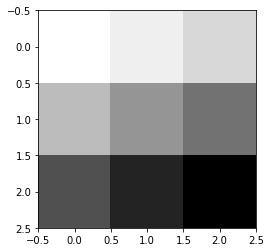

In [ ]:
plt.imshow(image.numpy().reshape(3, 3), cmap='Greys')
plt.show()

In [ ]:
weight = np.array([[[[1.]], [[1.]]], [[[1.]], [[1.]]]])
weight.shape

(2, 2, 1, 1)

In [ ]:
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='valid', kernel_initializer=weight_init)(image)
conv2d.shape

TensorShape([1, 2, 2, 1])

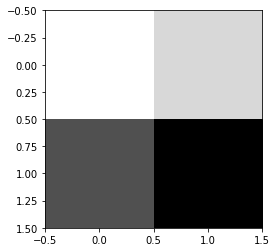

In [ ]:
plt.imshow(conv2d.numpy().reshape(2, 2), cmap='Greys')
plt.show()

In [ ]:
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='same', kernel_initializer=weight_init)(image)
conv2d.shape

TensorShape([1, 3, 3, 1])

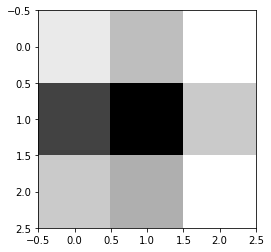

In [ ]:
plt.imshow(conv2d.numpy().reshape(3, 3), cmap='Greys')
plt.show()

In [ ]:
weight = np.array([[[[1., 10, -1]], [[1., 10, -1]]], [[[1., 10, -1]], [[1., 10, -1]]]])
weight.shape

(2, 2, 1, 3)

In [ ]:
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=3, kernel_size=2, padding='same', kernel_initializer=weight_init)(image)
conv2d.shape

TensorShape([1, 3, 3, 3])

feature_maps shape :  (3, 3, 3, 1)


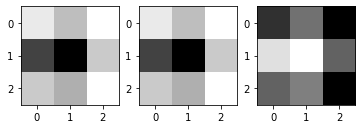

In [ ]:
feature_maps = np.swapaxes(conv2d, 0, 3)
print("feature_maps shape : ", feature_maps.shape)

for i, feature_map in enumerate(feature_maps):
    plt.subplot(1, 3, i+1)
    plt.imshow(feature_map.reshape(3, 3), cmap="Greys")
plt.show()

In [ ]:
image = tf.constant([[[[4], [3]], [[2], [1]]]], dtype=np.float32)
image.shape

TensorShape([1, 2, 2, 1])

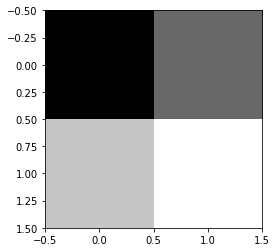

In [ ]:
plt.imshow(image.numpy().reshape(2, 2), cmap='Greys')
plt.show()

In [ ]:
pool = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=1, padding='valid')(image)
print(pool.shape)
print(pool.numpy())

(1, 1, 1, 1)
[[[[4.]]]]


In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images[0]

In [ ]:
train_images = train_images/255
test_images = test_images/255

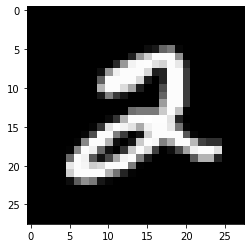

In [ ]:
img = train_images[5]
plt.imshow(img, cmap='gray')

In [ ]:
img = img.reshape(-1, 28, 28, 1)
img = tf.convert_to_tensor(img)

In [ ]:
from warnings import filters
weight_init = tf.keras.initializers.RandomNormal(stddev=0.01)
conv2d = tf.keras.layers.Conv2D(filters=5, kernel_size=(3, 3), strides=(2, 2), padding='same', kernel_initializer=weight_init)(img)

In [ ]:
conv2d.shape

TensorShape([1, 14, 14, 5])

In [ ]:
def display(conv2d, n, w, h):
    feature_maps = np.swapaxes(conv2d, 0, 3)
    for i, feature_map in enumerate(feature_maps):
        plt.subplot(1, n, i + 1)
        plt.imshow(feature_map.reshape(w, h), cmap='Greys')
    plt.show()


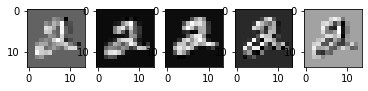

In [ ]:
display(conv2d, 5, 14, 14)

In [ ]:
pool = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same')(conv2d)
pool.shape

TensorShape([1, 7, 7, 5])

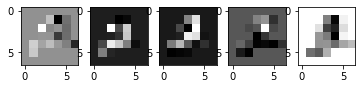

In [ ]:
display(pool, 5, 7, 7)

In [1]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

train_images = train_images/255.
test_images = test_images/255.

valid_images, test_images, valid_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.15, shuffle=True)

11501568/11490434 [==============================] - 0s 0us/step


In [38]:
print("train_images shape : ", train_images.shape)
print("valid_images shape : ", valid_images.shape)
print("test_images shape : ", test_images.shape)

train_images shape :  (60000, 28, 28, 1)
valid_images shape :  (8500, 28, 28, 1)
test_images shape :  (1500, 28, 28, 1)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu')) #18496 
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

inputs = Input(shape=(28, 28, 1))
conv1 = Conv2D(32, (3, 3), activation=tf.nn.relu)(inputs)
pool1 = MaxPool2D((2, 2))(conv1)

conv2 = Conv2D(64, (3, 3), activation=tf.nn.relu)(pool1)
pool2 = MaxPool2D((2, 2))(conv2)

conv3 = Conv2D(64, (3, 3), activation=tf.nn.relu)(pool2)
flat = Flatten()(conv3)

dense4 = Dense(64, activation='relu') (flat)
outputs = Dense(10, activation='softmax')(dense4)

model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 3, 3, 64)          3692

In [3]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
hist = model.fit(train_images, train_labels, 
                 validation_data=(valid_images, valid_labels),
                 epochs=100, batch_size=200)

Epoch 1/100
300/300 [==============================] - 16s 14ms/step - loss: 0.3246 - accuracy: 0.9046 - val_loss: 0.0884 - val_accuracy: 0.9727
Epoch 2/100
300/300 [==============================] - 4s 13ms/step - loss: 0.0784 - accuracy: 0.9761 - val_loss: 0.0552 - val_accuracy: 0.9824
Epoch 3/100
300/300 [==============================] - 5s 17ms/step - loss: 0.0530 - accuracy: 0.9839 - val_loss: 0.0448 - val_accuracy: 0.9858
Epoch 4/100
300/300 [==============================] - 4s 13ms/step - loss: 0.0418 - accuracy: 0.9870 - val_loss: 0.0353 - val_accuracy: 0.9892
Epoch 5/100
300/300 [==============================] - 4s 13ms/step - loss: 0.0343 - accuracy: 0.9890 - val_loss: 0.0290 - val_accuracy: 0.9914
Epoch 6/100
300/300 [==============================] - 4s 13ms/step - loss: 0.0283 - accuracy: 0.9909 - val_loss: 0.0279 - val_accuracy: 0.9908
Epoch 7/100
300/300 [==============================] - 4s 13ms/step - loss: 0.0239 - accuracy: 0.9923 - val_loss: 0.0329 - val_accuracy

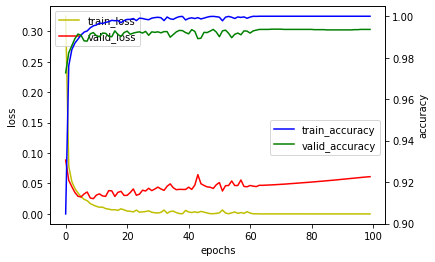

In [5]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='valid_loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist.history['accuracy'], 'b', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='valid_accuracy')
acc_ax.set_xlabel('epochs')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right', bbox_to_anchor=(1, 0.5))

plt.show()
